<h2>JPEG</h2>
This code exemplifies some of the steps used to encode JPGE images (block DCT and quantization)

<h3>Inicialização</h3>

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

<h3>DCT</h3>
http://bugra.github.io/work/notes/2014-07-12/discre-fourier-cosine-transform-dft-dct-image-compression/

In [2]:
%matplotlib inline
import cv2
import io
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.image as mpimg

In [3]:
# funções auxiliares
def get_2D_dct(img):
    """ Get 2D Cosine Transform of Image
    """
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def get_2d_idct(coefficients):
    """ Get 2D Inverse Cosine Transform of Image
    """
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

def get_reconstructed_image(raw):
    img = raw.clip(0, 255)
    img = img.astype('uint8')
    img = Image.fromarray(img)
    return img

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


def psnr(predictions, targets):
    rmsev = rmse(predictions, targets)
    return 20 * np.log10(255/rmsev)

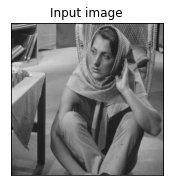

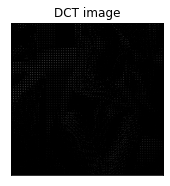

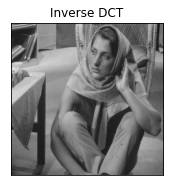

RMSE: 0.000


In [5]:
# extração da DCT para a imagem
img = cv2.imread('barb.tif',0)
img = img.astype(float)
img = img-128
step = 8

size = img.shape
IDCT = np.zeros(size, dtype=np.float)
DCT = np.zeros(size, dtype=np.float)

for y in range(0,size[0],step):
    for x in range(0,size[1],step):
        dct = get_2D_dct(img[y:y+step, x:x+step])
        idct = get_2d_idct(dct)
        IDCT[y:y+step, x:x+step] = idct
        DCT[y:y+step, x:x+step] = dct
    
img = img+128  
IDCT = IDCT+128

plt.subplot(121),plt.imshow(img, cmap = 'gray', clim=(0, 255))
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(DCT, cmap = 'gray', clim=(0, 255))
plt.title('DCT image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(IDCT, cmap = 'gray', clim=(0, 255))
plt.title('Inverse DCT'), plt.xticks([]), plt.yticks([])
plt.show()

# file with the DCT output
mpimg.imsave("dct.png", DCT, 0, 255, cmap='gray')

# file with the inverse of DCT
mpimg.imsave("idct.png", IDCT, 0, 255, cmap='gray')
print ("RMSE: %5.3f" % rmse(img, IDCT))

Quantization matrix:
[[ 16.  11.  10.  16.  24.  40.  51.  61.]
 [ 12.  12.  14.  19.  26.  58.  60.  55.]
 [ 14.  13.  16.  24.  40.  57.  69.  56.]
 [ 14.  17.  22.  29.  51.  87.  80.  62.]
 [ 18.  22.  37.  56.  68. 109. 103.  77.]
 [ 24.  35.  55.  64.  81. 104. 113.  92.]
 [ 49.  64.  78.  87. 103. 121. 120. 101.]
 [ 72.  92.  95.  98. 112. 100. 103.  99.]]

Patch after DCT:
[[-232.375    3.594    6.815    9.168   -0.625    1.055    1.101   -0.339]
 [ -20.004    3.097    8.617   -2.961    0.808   -4.732   -6.032   -1.289]
 [   3.301    4.235    5.438    2.736   -7.604   -0.618   -2.972   -5.147]
 [  -6.143   -8.582   -4.676    4.127    4.242    4.127    1.458   -0.844]
 [   5.875    7.281   -3.549   -2.936    1.125    2.829    0.252   -1.339]
 [   1.282    1.417   -1.623    1.713    1.481   -2.231   -2.786    1.916]
 [  -1.503   -0.917    1.028    2.173   -1.045    1.287    0.312    2.47 ]
 [  -0.134   -1.704    1.083    0.734   -0.986   -2.034    4.205   -0.493]]

Patch to be co

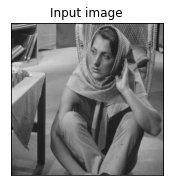

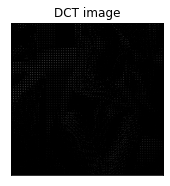

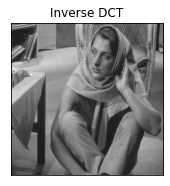

RMSE: 5.748
PSNR: 32.940


In [6]:
# aplicação da tabela de quantização
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# quantization matrix
QM = np.matrix([[16, 11, 10, 16, 24, 40, 51, 61], 
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

# poor quantization matrix
#QM = np.matrix([[16, 220, 220, 16, 24, 40, 51, 61], 
#                [220, 220, 220, 19, 26, 58, 60, 55],
#                [220, 220, 220, 24, 40, 57, 69, 56],
#                [120, 17, 22, 29, 51, 87, 80, 62],
#                [18, 22, 37, 56, 68, 109, 103, 77],
 #               [24, 35, 55, 64, 81, 104, 113, 92],
 #               [49, 64, 78, 87, 103, 121, 120, 101],
 #               [72, 92, 95, 98, 112, 100, 103, 99]])

# poor quantization matrix
#QM = np.matrix([[1000, 1000, 1000, 1000, 1000, 1, 1, 1], 
#                [1000, 1000, 1000, 1000, 1000, 1, 1, 1],
#                [1000, 1000, 1000, 1000, 1000, 1, 1, 1],
#                [1000, 1000, 1000, 1000, 1000, 1, 1, 1],
#                [1000, 1000, 1000, 1, 1, 1, 1, 1],
#                [24, 35, 1, 1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1, 1, 1, 1]])

# quantization matrix with ones
#QM = np.ones((8,8), dtype=np.float)

QM = QM.astype(float)

useDC = True  # encode or not DC coefficient with DCT


print ("Quantization matrix:")
print (QM)

img = img-128
for y in range(0,size[0],step):
    for x in range(0,size[1],step):
        dct = get_2D_dct(img[y:y+step, x:x+step])
        odct = dct
        DC = dct[0,0]
        
        dct = np.divide(dct, QM)
        dct = dct.round()
        coddct = dct
        
        dct = np.multiply(dct, QM)
        if (useDC == True):
            dct[0,0] = DC         
        IDCT[y:y+step, x:x+step] = get_2d_idct(dct)
             
print ("\nPatch after DCT:"  )      
print (odct)

print ("\nPatch to be coded:")
print (coddct)

print ("\nReconstructed patch:")
print (dct )     
        
IDCT = IDCT + 128  
img = img + 128
        
plt.subplot(121),plt.imshow(img, cmap = 'gray', clim=(0, 255))
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(DCT, cmap = 'gray', clim=(0, 255))
plt.title('DCT image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(IDCT, cmap = 'gray', clim=(0, 255))
plt.title('Inverse DCT'), plt.xticks([]), plt.yticks([])
plt.show()

#file with decoded JPEG
mpimg.imsave("outJPEG.png", IDCT, 0, 255, cmap='gray')

print ("RMSE: %5.3f" % rmse(img, IDCT))
print ("PSNR: %5.3f" % psnr(img, IDCT))